<a href="https://colab.research.google.com/github/DanayaDiarra/DanayaGsom/blob/master/Linear_Reg_Car_Accident_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# OLS regression
import statsmodels.api as sm
import statsmodels.stats as stats_m
from statsmodels.formula.api import ols

# prediction metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

## 1_Uploading **data**

In [ ]:
data = pd.read_excel('/content/ukcars (1).xlsx', 'data', index_col= None)

In [ ]:
data.head()

,year,newcars,accidents
0,1958,352,166
1,1959,373,153
2,1960,411,177
3,1961,441,201
4,1962,462,216


## **2_Exploratory Data Analysis**

# **2.1_Descriptive Statistics**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       12 non-null     int64
 1   newcars    12 non-null     int64
 2   accidents  12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [ ]:
data.describe().round(1)

,year,newcars,accidents
count,12.0,12.0,12.0
mean,1963.5,537.6,222.5
std,3.6,151.2,43.2
min,1958.0,352.0,153.0
25%,1960.8,425.2,195.0
50%,1963.5,495.5,221.5
75%,1966.2,653.8,268.2
max,1969.0,800.0,277.0


# **2.2_Graphical Analysis: Individual Time Series**

In [ ]:
def myTSplot(x, label):
  plt.figure()
  data[x].plot()
  plt.title("Plot of " + label)
  plt.xticks(range(12), data['year'], rotation='vertical')
  plt.grid()
  plt.show()


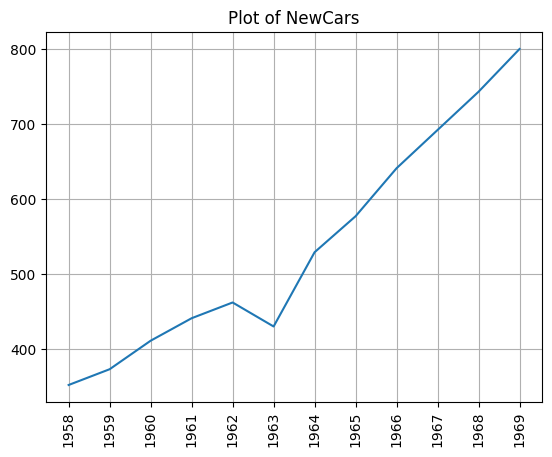

In [ ]:
myTSplot("newcars", "NewCars")

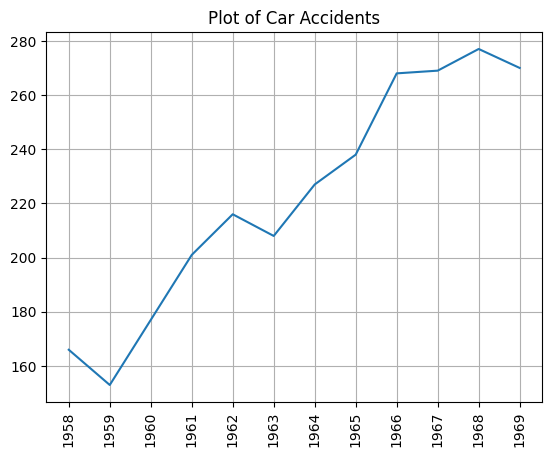

In [ ]:
myTSplot("accidents", "Car Accidents")

## **2.3_Correlation and Graphical Analysis (Scatter Plot)**

In [ ]:
#Extract Variables
year = data["year"]
newcars = data["newcars"]
accidents = data["accidents"]


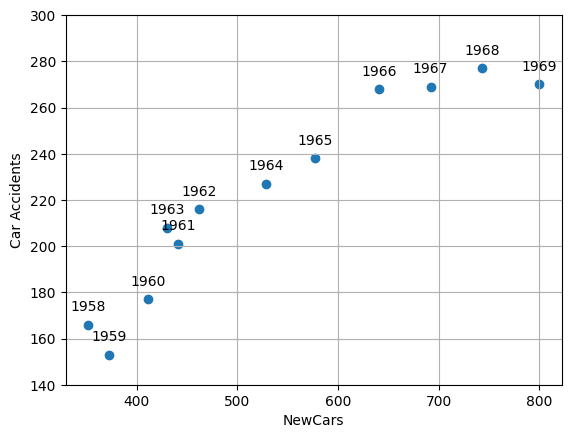

In [ ]:
#Scatter plot
plt.figure()
plt.scatter(newcars, accidents)
plt.xlabel("NewCars")
plt.ylabel("Car Accidents")
plt.grid()
plt.ylim(140, 300)


#Adding label to the data points
for i, x, y in zip(year, newcars, accidents):
  label = f"{i}"
  plt.annotate(
      i, (x,y),
      textcoords = " offset points",
      xytext = (0, 10),
      ha = "center"
  )


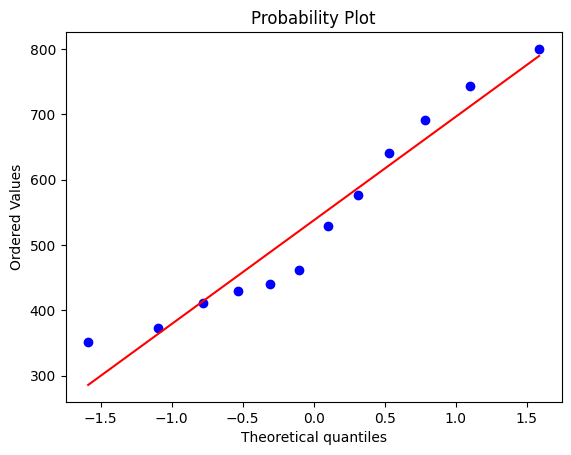

In [ ]:
##QQ plot: Newcars
plt.figure()
stats.probplot(newcars, dist="norm", plot = plt)
plt.show()


In [ ]:
# Jarque-Bera Normality test
JB_test = pd.DataFrame(stats.jarque_bera(accidents), columns=["value"],
                       index = ['chi^2 test statistic', 'Chi^2 test P_value'])

In [ ]:
print("\n----------The Jarque_Bera Normality test for Cons---------- ")
print(JB_test)


----------The Jarque_Bera Normality test for Cons---------- 
                         value
chi^2 test statistic  0.864742
Chi^2 test P_value    0.648969


**a,**
**H0:** The null hypothesis for the JB test is that the data is normally distributed.

**H1:** The Data is not normaly distributed

***b***,
**P_Value:**
with a **P-value** of approximately 0.649, there is insufficient evidence(against **H0**)
to conclude that the data is not normally distributed.

In [ ]:
JB_test = pd.DataFrame(stats.jarque_bera(newcars), columns=["value"],
                       index = ["Chi^2 test statistic JB", "Chi^2 P_value JB"])
print("\n ----------Jarque_Bera Normality Test----------")
print(JB_test)



 ----------Jarque_Bera Normality Test----------
                            value
Chi^2 test statistic JB  1.077421
Chi^2 P_value JB         0.583500


In [ ]:
#Pair-Wise Correlation analysis
Coefpears , Pvpears = stats.pearsonr(accidents, newcars)
print("Pearson's correlation coefficient =", round(Coefpears, 3))
print("Pearson's correlation P-Value =", round(Pvpears, 4))


Pearson's correlation coefficient = 0.946
Pearson's correlation P-Value = 0.0


**Pearson's Correlation Coefficient: 0.946**
Indicates a very **strong positive correlation** between the **two variables(NewCars and Accidents)**. A coefficient close to **+1** suggests that as one variable increases, the other variable also tends to increase significantly.

**H0:** No correlation

**H1:** Correlation exists

**P-Value:** 0.0

p-value of **0.0** (or very close to **0**) less than **0.05** indicates that the correlation observed is statistically significant. This means that there's a very low probability that the correlation occurred due to random chance. **So we reject H0**

## **3_ Linear Regression Analysis**

**3.1_ Model1: Pair-wise Linear regression estimation**

In [ ]:
#Creating the training sample
data_train = data[0:10] #10 observations

#Creating the test sample
data_test = data[10:12] #2 observations

In [ ]:
# Estimating the model
formula1 =   "accidents ~ newcars"
model1 = ols(formula1, data_train).fit()


In [ ]:
model1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              accidents   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     96.74
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           9.61e-06
Time:                        20:34:01   Log-Likelihood:                -37.642
No. Observations:                  10   AIC:                             79.28
Df Residuals:                       8   BIC:                             79.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.6376     17.044      2.854      0.021       9.334      87.941
newcars        0.3335      0.034      9.836      0.000       0.255       0.412
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.309
Skew:                          -0.270   Prob(JB):                        0.857
Kurtosis:                       2.329   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Explanation:


 **Key Metrics**
1. **Dependent Variable**:
   - **accidents**: This is the variable being predicted or explained.

2. **R-squared (0.924)**:
   - This indicates that approximately 92.4% of the variance in the number of accidents can be explained by the model. A higher R-squared value suggests a better fit.

3. **Adjusted R-squared (0.914)**:
   - This adjusts the R-squared value for the number of predictors in the model, providing a more accurate measure when multiple variables are included. Here, it's also quite high, indicating a good model fit.

4. **F-statistic (96.74)** and **Prob (F-statistic) (9.61e-06)**:
   - The F-statistic tests the overall significance of the model. A high F-statistic and a very low p-value (much less than 0.05) suggest that the model is statistically significant and that at least one predictor variable has a non-zero coefficient.

5. **Log-Likelihood (-37.642)**:
   - This value is used in comparing models; higher values indicate a better fit.

6. **AIC (79.28) and BIC (79.89)**:
   - These are criteria for model selection. Lower values generally indicate a better model when comparing multiple models.

**Coefficients Table**

- **coef**: These are the estimated coefficients for the intercept and the predictor variable.
  - **Intercept (48.6376)**: This is the expected value of accidents when the number of new cars is zero.
  - **newcars (0.3335)**: For each additional new car, the model predicts an increase of about 33% accidents.

- **std err**: Standard errors of the coefficients, indicating the variability of the coefficient estimates.
  
- **t**: The t-statistic for the hypothesis test of whether the coefficient is significantly different from zero.

- **P>|t|**: The p-value associated with the t-statistic. A value less than 0.05 (like 0.000 for newcars) indicates that the predictor is statistically significant.

- **[0.025, 0.975]**: This is the 95% confidence interval for the coefficients. For newcars, it suggests that we are 95% confident that the true effect of new cars on accidents is between 0.255 and 0.412.

**Diagnostic Statistics**

- **Omnibus (0.232) and Prob(Omnibus) (0.891)**: Tests for the normality of residuals; a high p-value suggests that the residuals are normally distributed.

- **Durbin-Watson (1.238)**: Tests for autocorrelation in the residuals. Values close to 2 suggest no autocorrelation.

- **Skew (-0.270)** and **Kurtosis (2.329)**: These describe the shape of the residuals' distribution. Close to 0 skewness indicates a symmetric distribution, while kurtosis near 3 indicates a normal distribution.

- **Cond. No. (2.32e+03)**: This indicates potential multicollinearity; a condition number above 30 suggests potential issues.

**Summary**

Overall, the OLS regression results indicate a strong relationship between the number of new cars and the number of accidents, with the model explaining a significant portion of the variance. The predictors used in the model appear to be statistically significant, and the diagnostics suggest that the model's assumptions are reasonably met.

In [ ]:
# get the estimates of coefficients
model1.params

,0
Intercept,48.637570
newcars,0.333461


##  **3.2_ Hypotheses Testing**

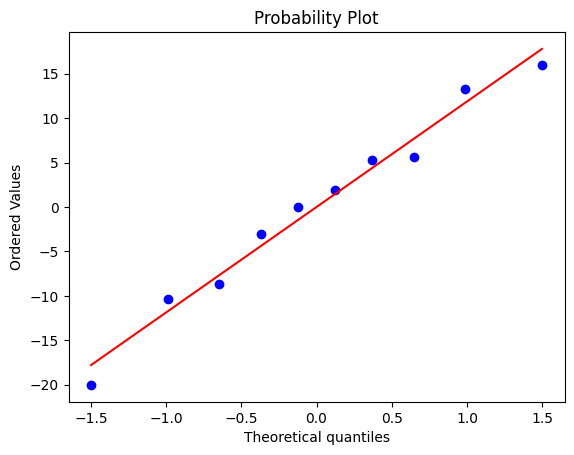

In [ ]:
# test the disturbances for normality
# using the Jarque-Bera test


#Residuals: QQ plot

plt.figure()
stats.probplot(model1.resid, dist = "norm", plot = plt)
plt.show()

In [ ]:
# The Breusch-Pagan heteroskedasticity test


BP_test = pd.DataFrame(stats_m.diagnostic.het_breuschpagan(model1.resid, model1.model.exog), columns=["value"],
                       index=["Chi^2 Test statistic :", "Chi^2 test P-value :", "F-test statistic:", "F-test P-Value:"])

In [ ]:
print("------The Breu-Pagan test-------")
print(BP_test)

------The Breu-Pagan test-------
                           value
Chi^2 Test statistic :  1.225542
Chi^2 test P-value :    0.268276
F-test statistic:       1.117373
F-test P-Value:         0.321357


H**YPOTHESES:**

**Chi^2 Test**

**H0:** There no heteroskedasticity

**H1:** There is Heteroskedasticity

P-Value = 0.268 > 0.05  We fail to reject **H0**.

There is not sufficient evidence to conclude that heteroscedasticity is present.


---

**F-Test**

H0: There no heteroskedasticity

H1: There is Heteroskedasticity

P-Value = 0.321 > 0.05
.  We fail to reject H0.

There is not sufficient evidence to conclude that heteroscedasticity is present.


In [ ]:
# The Breusch-Godfrey autocorrelation test

BG_test = pd.DataFrame(stats_m.diagnostic.acorr_breusch_godfrey(model1, nlags=1), columns=["value"],
                       index= ["Chi^2 Test statistic:", "Chi^2 Test P-value:", "F-test statistic:", "F-test P-Value:"])
print("\n ---------The Breusch-Godfrey autocorrelation test---------")
print(BG_test)


 ---------The Breusch-Godfrey autocorrelation test---------
                          value
Chi^2 Test statistic:  1.306638
Chi^2 Test P-value:    0.253004
F-test statistic:      1.052121
F-test P-Value:        0.339153


**HYPOTHESES:**

**H0:** There no autocorrelation

**H1:** Autocorrelation is present


---


**Chi^2 Test**

P-Value = 0.253 > 0.05

   We do not have enough evidence to conclude that autocorrelation is present in your model.
   
   So we fail to reject HO



---
**F-Test**
P-Value = 0.339 > 0.05

 We fail to reject **H0**, suggesting that there is no significant evidence of autocorrelation among the residuals.



# Test of Coefficients

In [ ]:
# test the coefficients for individual statistical significance

#Linear Hypothesis test

linHypothesis ="(newcars = 0.5)"
print(model1.f_test(linHypothesis))

<F test: F=24.12899796754961, p=0.0011756285577164038, df_denom=8, df_num=1>


# **3.3_ Model1: In-sample Prediction**

In [ ]:
# predict for in-sample observations
acc_pred_train = model1.get_prediction(data_train, weights=1).summary_frame(alpha= 0.05)
acc_pred_train.head(3).round(2)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,166.02,5.98,152.23,179.81,135.78,196.25
1,173.02,5.44,160.48,185.56,143.33,202.70
2,185.69,4.58,175.14,196.24,156.79,214.59


In [ ]:
#Actual Data
data.head(3)

,year,newcars,accidents
0,1958,352,166
1,1959,373,153
2,1960,411,177


# **Mean Predictions:**

The model predicts on **average 166.02 accidents** for the first observation corresponding to the year **1958.**

# **The mean confidence intervals** (from mean_ci_lower and mean_ci_upper)

 Indicate the uncertainty around the predicted mean. A **95% confidence interval** means we can be **95% confident** that the **true mean number of accidents** lies within that range.

#**The observation confidence intervals** (from obs_ci_lower and obs_ci_upper)

Provide a range within which we expect the actual number of accidents to fall for each specific observation.

In [ ]:
# Root Mean Square Error(RMSE)

np.sqrt(MSE(acc_pred_train["mean"], data_train["accidents"])).round(2)

10.44

In [ ]:
# Mean Absolute Error (MAE)
mae_value = MAE(acc_pred_train["mean"], data_train["accidents"])
rounded_mae = round(mae_value, 2)
print(rounded_mae)


8.43


In [ ]:
data.describe().round(2)

,year,newcars,accidents
count,12.00,12.00,12.00
mean,1963.50,537.58,222.50
std,3.61,151.18,43.20
min,1958.00,352.00,153.00
25%,1960.75,425.25,195.00
50%,1963.50,495.50,221.50
75%,1966.25,653.75,268.25
max,1969.00,800.00,277.00


# **3.4_ Model1: Out-of-Sample Prediction**

In [ ]:
predict = model1.get_prediction(data_test, weights=1).summary_frame(alpha= 0.05).round(2)

In [ ]:
print(predict)

     mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  296.40     9.31         274.92         317.87        261.97        330.83
1  315.41    11.11         289.78         341.03        278.25        352.56
